In [1]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:157


### One-dimensional approximations

In [2]:
B = FourierBasis(61);
D = Interval(-0.5,0.5);
f1(x) = x
F1 = Fun(f1,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/roelmatthysen/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /U

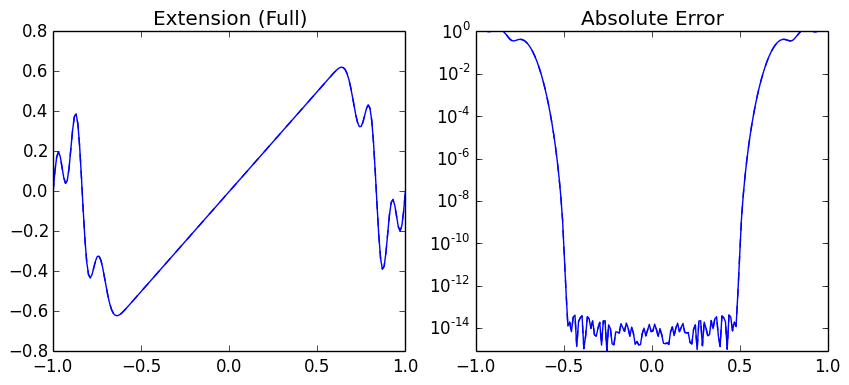

In [3]:
figure(figsize=(10,4))
subplot(121); plot_expansion(F1)
subplot(122); plot_error(F1,f1)
savefig("../images/lowprecision.png")

In [4]:
F1(0.5)

0.49999999991782634 + 7.580302215817698e-11im

In [5]:
f2(x) = cos(50*x)
F2 = Fun(f2, B, D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


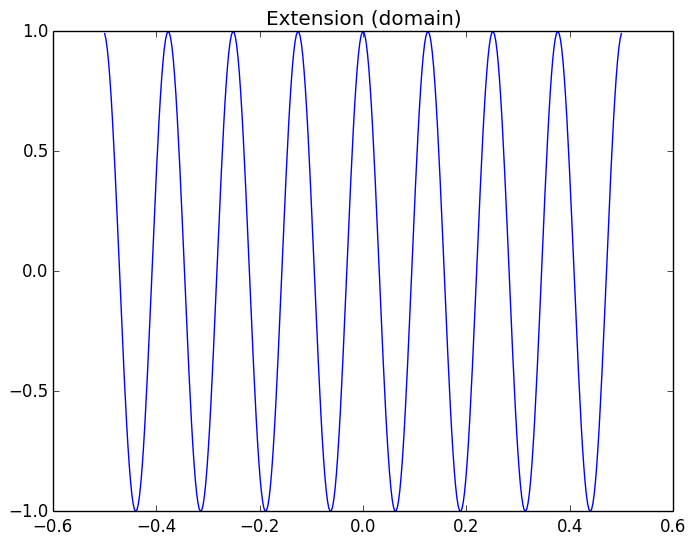

PyObject <matplotlib.text.Text object at 0x31bed9fd0>

In [6]:
FrameFuns.plot(F2,n=400)

In [7]:
f3(x) = cos(10*x.^2)
B = ChebyshevBasis(41)
D = Interval(-0.9,0.9)
F3 = Fun(f3,B,D)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: the interval [-0.9, 0.9]


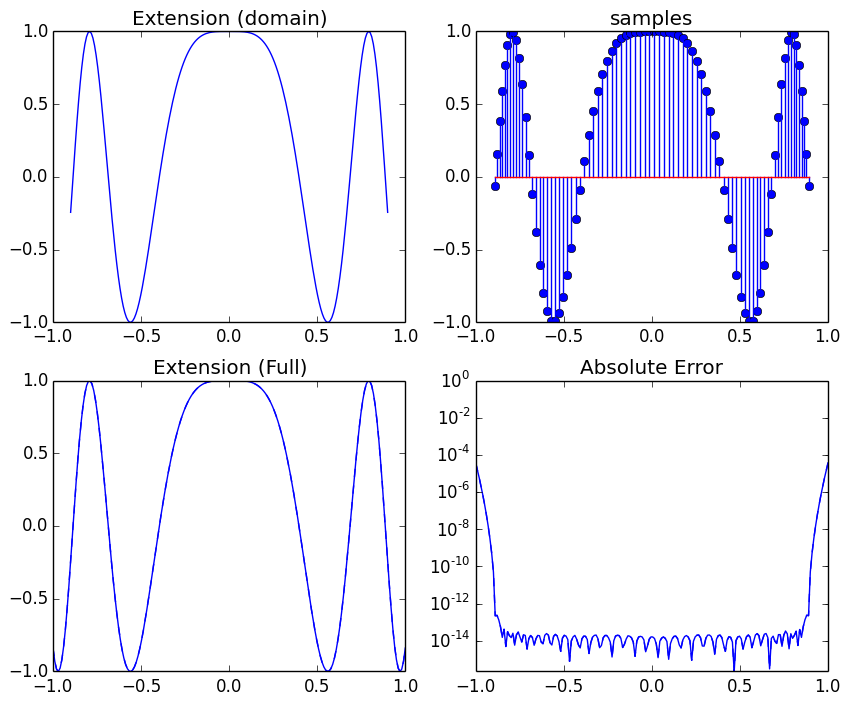

PyObject <matplotlib.text.Text object at 0x31c65cc90>

In [8]:
figure(figsize=(10,8))
subplot(221); FrameFuns.plot(F3)
subplot(222); plot_samples(F3)
subplot(223); plot_expansion(F3)
subplot(224); plot_error(F3,f3)

Interact.Slider{Float64}([Reactive.Input{Float64}] 2.0,"myT",2.0,1.0:0.05:3.0)

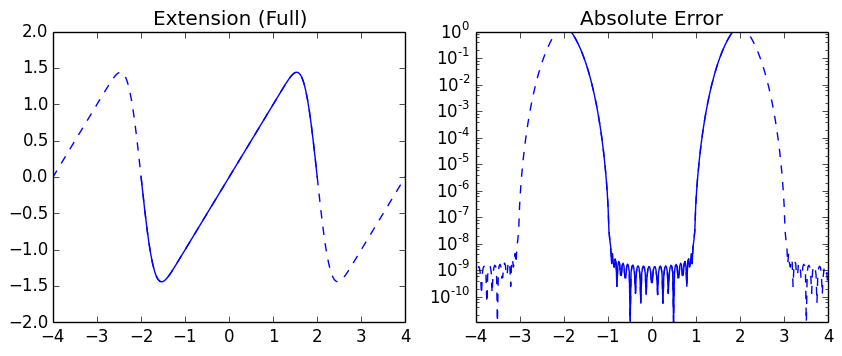

In [9]:
h = figure(figsize=(10,8))
D = Interval(-1.0,1.0)
@manipulate for myT=1.0:0.05:3.0; withfig(h) do
        B = rescale(FourierBasis(21),-myT,myT)
        F=Fun(f1,B,D)
        subplot(221); plot_expansion(F,repeats=1); xlim([-4; 4]); ylim([-2; 2])
        subplot(222); plot_error(F, f1,repeats=1); xlim([-4; 4]); ylim([-10^16; 1])
    end
end

### High precision

In [10]:
B = FourierBasis(61,Complex{BigFloat})
D = Interval(-0.5,0.5)
fh(x) = x
Fh = Fun(fh,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


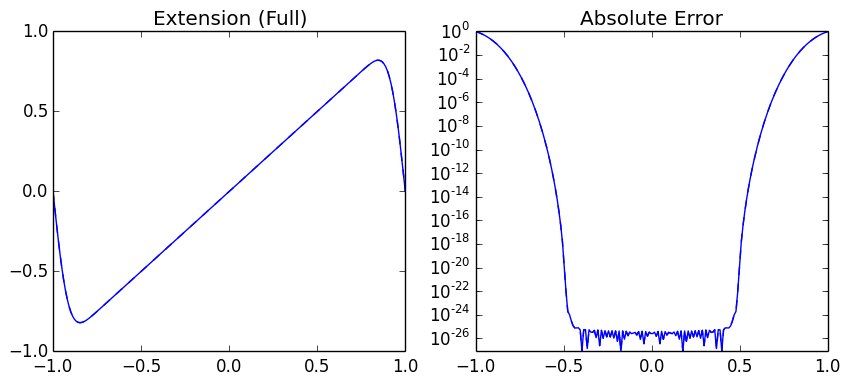

In [11]:
figure(figsize=(10,4))
subplot(121); plot_expansion(Fh)
subplot(122); plot_error(Fh,fh)
savefig("../images/highprecision.png")

### 2D approximations

##### Simple domains and simple functions

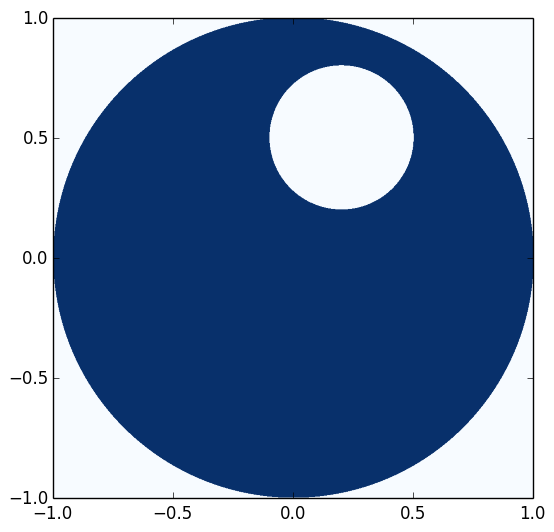

PyObject <matplotlib.image.AxesImage object at 0x31d8bfc10>

In [12]:
C = Disk(1.0)- Disk(0.3,[0.2; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [13]:
B = FourierBasis(31,-1.3,1.3) ⊗ FourierBasis(31,-1.3,1.3)
f(x,y) = exp(x+y)
F = Fun(f,B,C)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.3  ,  1.3 ] x Fourier series, mapped to [ -1.3  ,  1.3 ])
Domain: the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 1.0 centered at [0.0,0.0]



In [14]:
F(-0.6,0.4)

0.8187308532596163 - 5.167422045815329e-10im

In [15]:
f(-0.6, 0.4)

0.8187307530779819

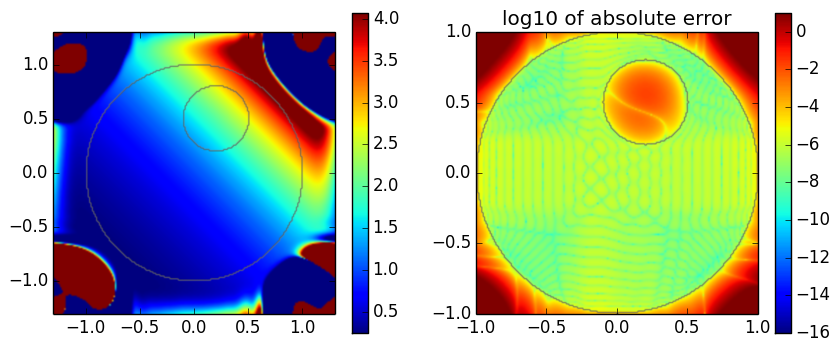

PyObject <matplotlib.text.Text object at 0x3179881d0>

In [16]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

##### Simple domains and harder functions

In [17]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

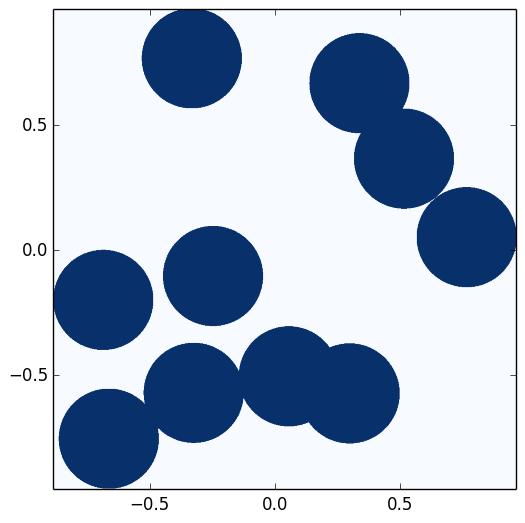

In [18]:
FrameFuns.plot_domain(dom,n=1000);

In [19]:
B = FourierBasis(31) ⊗ ChebyshevBasis(31)
f(x,y) = cos(20*x+22*y)
F = Fun(f,B,dom)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series x Chebyshev series (first kind))
Domain: a collection of 10 domains


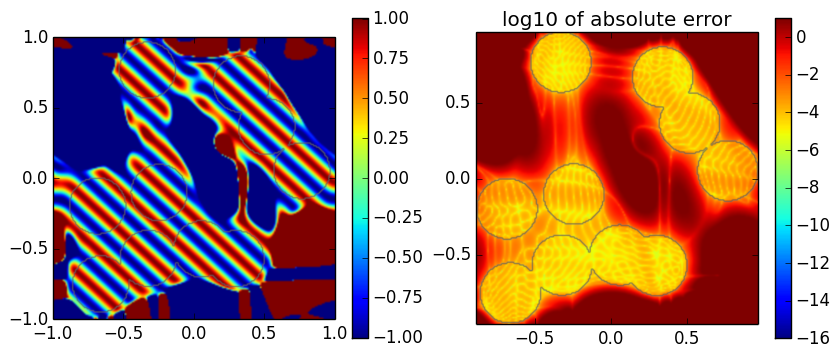

PyObject <matplotlib.text.Text object at 0x31be25050>

In [20]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

##### Fractal domains

In [21]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

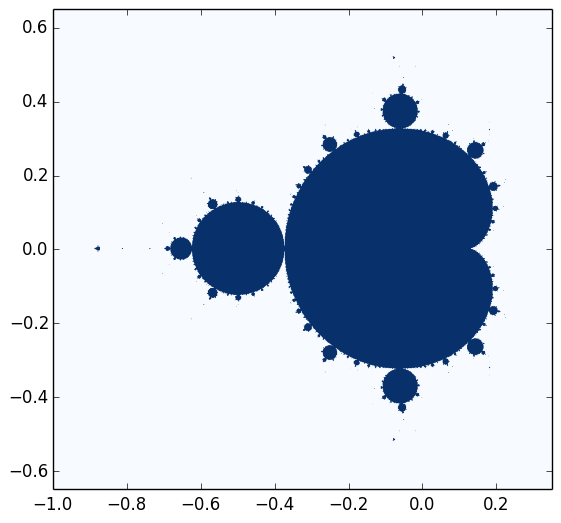

PyObject <matplotlib.image.AxesImage object at 0x3172dcb50>

In [22]:
plot_domain(mandelbrot, n=1001)

In [23]:
B = FourierBasis(31,-1.0,0.35) ⊗ FourierBasis(31,-0.65,0.65)
f(x,y) = cos(10*x*y)
F = Fun(f, B, mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  0.35 ] x Fourier series, mapped to [ -0.65  ,  0.65 ])
Domain: The Mandelbrot set


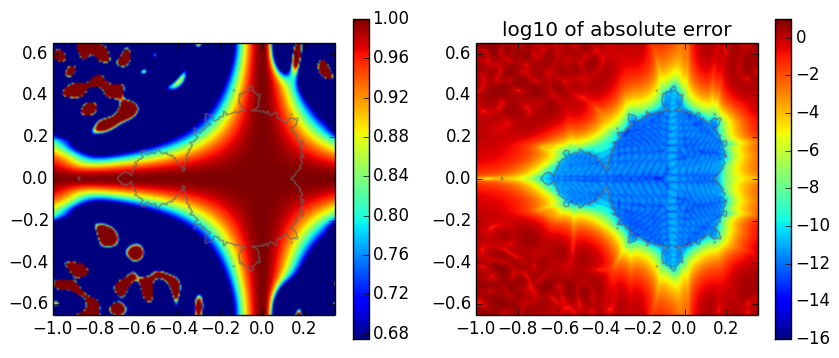

PyObject <matplotlib.text.Text object at 0x31fc2fd90>

In [24]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

In [25]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

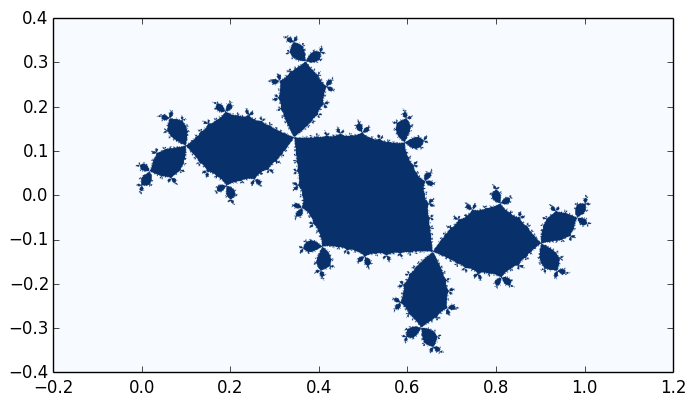

PyObject <matplotlib.image.AxesImage object at 0x32139d710>

In [26]:
plot_domain(julia)

In [27]:
B = ChebyshevBasis(31,-0.2,1.2) ⊗ ChebyshevBasis(31, -0.4, 0.4)
f(x,y) = cos(10*x*y)
F = Fun(f, B, julia)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Chebyshev series (first kind), mapped to [ -0.2  ,  1.2 ] x Chebyshev series (first kind), mapped to [ -0.4  ,  0.4 ])
Domain: A particular Julia Set also known as the Douady rabbit


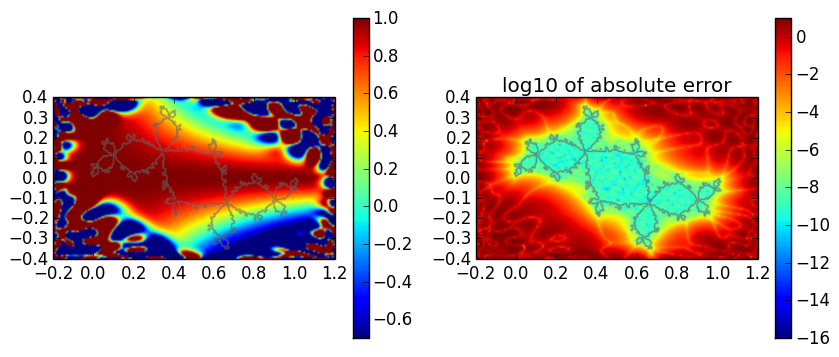

PyObject <matplotlib.text.Text object at 0x3233e6090>

In [28]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

### 3D approximations

##### Simple domains and simple functions

In [29]:
S = Sphere(1.0)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[29], in expression starting on line 1

In [30]:
plot(S)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[30], in expression starting on line 1

In [31]:
f3 = ExpFun( (x,y,z) -> cos(x-2y+3z), Sphere(1.0), dof=5)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[31], in expression starting on line 1

In [32]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[32], in expression starting on line 1

In [33]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[33], in expression starting on line 1

##### Harder domains

In [34]:
atom = atomium()

LoadError: LoadError: MethodError: `+` has no method matching +(::FixedSizeArrays.Vec{3,Float64}, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{S,T}(!Matched::Range{S}, ::AbstractArray{T,N})
  +(!Matched::SparseMatrixCSC{Tv,Ti<:Integer}, ::Array{T,N})
  ...
while loading In[34], in expression starting on line 1

In [35]:
plot(atomium, n=50)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[35], in expression starting on line 1

In [36]:
f3 = ExpFun( (x,y,z) -> cos(x+y-2*z), atomium, dof=5)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[36], in expression starting on line 1

In [37]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[37], in expression starting on line 1

In [38]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[38], in expression starting on line 1

##### Harder functions?

In [39]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=21, method="lsqr")

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[39], in expression starting on line 1

In [40]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[40], in expression starting on line 1

In [41]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=51, method="lsqr")

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[41], in expression starting on line 1